In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# !pip install imbalanced-learn
import imblearn

from collections import Counter

from imblearn.over_sampling import SMOTE

TEST_SIZE = 0.2

In [2]:
def plot_single_categorical(df, col):
    plt.figure(figsize = (8, 4))
    plt.bar(x = df[col].value_counts().index, height = df[col].value_counts(), color = mcolors.TABLEAU_COLORS)
    sns.despine(top = True)
    n_level = df[col].nunique()
    for x_coor in range(n_level):
        plt.annotate(df[col].value_counts().iloc[x_coor], 
                     xy = (x_coor, 
                           df[col].value_counts().iloc[x_coor] + df[col].value_counts().iloc[0]/50))
    plt.xticks(rotation = 60)
    plt.grid()
    plt.title(col)
    plt.show()

In [3]:
def predict_decision_tree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

In [4]:
def predict_random_forest(X_train, X_test, y_train, y_test):
    rfc = RandomForestClassifier(random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    return {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

In [5]:
def predict_boosting(X_train, X_test, y_train, y_test):
    gbc = GradientBoostingClassifier(random_state=0)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    return {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True)
    }

In [6]:
def print_dict(d):
    for x1, y1 in d.items():
        if isinstance(y1, dict):
            print('{}:'.format(x1))
            for x2, y2 in y1.items():
                print('{}:\n{}'.format(x2, y2))
        else:
            print('{}:\n{}\n'.format(x1, y1))

In [7]:
dt = pd.read_csv("./ObesityDataSet_raw_and_data_sinthetic.csv")
dt

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
le_arr = {}
for i in dt.columns:
    le_arr[i] = LabelEncoder()

In [9]:
column_names = dt.columns.to_numpy()
column_names

array(['Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'], dtype=object)

In [10]:
class_names = np.unique(dt['NObeyesdad'])
class_names

array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
       'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
       'Overweight_Level_II'], dtype=object)

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [12]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [13]:
dt.shape

(2111, 17)

In [14]:
for col in dt.columns:
    print('{}:\n{}\n'.format(col, dt[col].sort_values().unique()))

Gender:
['Female' 'Male']

Age:
[14.      15.      16.      ... 55.24625 56.      61.     ]

Height:
[1.45     1.456346 1.48     ... 1.947406 1.975663 1.98    ]

Weight:
[ 39.        39.101805  39.371523 ... 160.935351 165.057269 173.      ]

family_history_with_overweight:
['no' 'yes']

FAVC:
['no' 'yes']

FCVC:
[1.       1.003566 1.005578 1.00876  1.031149 1.036159 1.036414 1.052699
 1.053534 1.063449 1.064162 1.067909 1.078529 1.081585 1.0816   1.096455
 1.108663 1.116068 1.118436 1.122127 1.123672 1.123939 1.133844 1.140615
 1.142468 1.164062 1.168856 1.188089 1.202075 1.203754 1.204855 1.206276
 1.212908 1.21498  1.220024 1.261288 1.263216 1.264234 1.270448 1.276858
 1.27785  1.289315 1.303878 1.306844 1.31415  1.317729 1.321028 1.3307
 1.34138  1.344854 1.362441 1.368978 1.369529 1.387489 1.392665 1.397468
 1.412566 1.428289 1.431346 1.443674 1.450218 1.451337 1.452524 1.455602
 1.457758 1.469384 1.475906 1.482722 1.4925   1.492834 1.517912 1.518966
 1.521604 1.522001 1.524428 1.

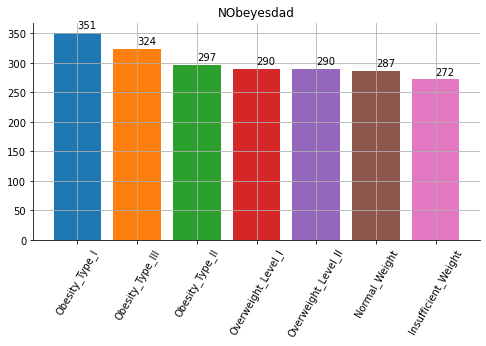

In [15]:
plot_single_categorical(dt, 'NObeyesdad')

In [16]:
dt_ft = dt.copy()
dt_ft['Gender'] = le_arr['Gender'].fit_transform(dt['Gender'])
dt_ft['family_history_with_overweight'] = le_arr['family_history_with_overweight'].fit_transform(dt['family_history_with_overweight'])
dt_ft['FAVC'] = le_arr['FAVC'].fit_transform(dt['FAVC'])
dt_ft['CAEC'] = le_arr['CAEC'].fit_transform(dt['CAEC'])
dt_ft['SMOKE'] = le_arr['SMOKE'].fit_transform(dt['SMOKE'])
dt_ft['SCC'] = le_arr['SCC'].fit_transform(dt['SCC'])
dt_ft['CALC'] = le_arr['CALC'].fit_transform(dt['CALC'])
dt_ft['MTRANS'] = le_arr['MTRANS'].fit_transform(dt['MTRANS'])
dt_ft['NObeyesdad'] = le_arr['NObeyesdad'].fit_transform(dt['NObeyesdad'])

# dt_ft

In [17]:
dt_ft_X = dt_ft.drop(['NObeyesdad'], axis=1)
dt_ft_y = dt_ft['NObeyesdad']
dt_ft_X_train, dt_ft_X_test, dt_ft_y_train, dt_ft_y_test = train_test_split(dt_ft_X, dt_ft_y, test_size=TEST_SIZE)

In [18]:
dt_ft_pdt = predict_decision_tree(dt_ft_X_train, dt_ft_X_test, dt_ft_y_train, dt_ft_y_test)
print_dict(dt_ft_pdt)

confusion_matrix:
[[47  1  0  0  0  0  0]
 [ 3 49  0  0  0  0  0]
 [ 0  0 74  3  0  0  1]
 [ 0  0  1 65  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  2  0  0  0 57  3]
 [ 0  0  0  0  0  4 51]]

classification_report:
0:
{'precision': 0.94, 'recall': 0.9791666666666666, 'f1-score': 0.9591836734693877, 'support': 48}
1:
{'precision': 0.9423076923076923, 'recall': 0.9423076923076923, 'f1-score': 0.9423076923076923, 'support': 52}
2:
{'precision': 0.9866666666666667, 'recall': 0.9487179487179487, 'f1-score': 0.9673202614379085, 'support': 78}
3:
{'precision': 0.9558823529411765, 'recall': 0.9848484848484849, 'f1-score': 0.9701492537313432, 'support': 66}
4:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 62}
5:
{'precision': 0.9344262295081968, 'recall': 0.9193548387096774, 'f1-score': 0.9268292682926829, 'support': 62}
6:
{'precision': 0.9272727272727272, 'recall': 0.9272727272727272, 'f1-score': 0.9272727272727272, 'support': 55}
accuracy:
0.9574468085106383
macro avg:
{'precisio

In [19]:
dt_ft_pdt = predict_random_forest(dt_ft_X_train, dt_ft_X_test, dt_ft_y_train, dt_ft_y_test)
print_dict(dt_ft_pdt)

confusion_matrix:
[[42  6  0  0  0  0  0]
 [ 0 52  0  0  0  0  0]
 [ 0  0 73  1  0  0  4]
 [ 0  0  0 66  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  7  0  0  0 55  0]
 [ 0  2  1  0  0  2 50]]

classification_report:
0:
{'precision': 1.0, 'recall': 0.875, 'f1-score': 0.9333333333333333, 'support': 48}
1:
{'precision': 0.7761194029850746, 'recall': 1.0, 'f1-score': 0.8739495798319328, 'support': 52}
2:
{'precision': 0.9864864864864865, 'recall': 0.9358974358974359, 'f1-score': 0.9605263157894737, 'support': 78}
3:
{'precision': 0.9850746268656716, 'recall': 1.0, 'f1-score': 0.9924812030075187, 'support': 66}
4:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 62}
5:
{'precision': 0.9649122807017544, 'recall': 0.8870967741935484, 'f1-score': 0.9243697478991597, 'support': 62}
6:
{'precision': 0.9259259259259259, 'recall': 0.9090909090909091, 'f1-score': 0.9174311926605504, 'support': 55}
accuracy:
0.9456264775413712
macro avg:
{'precision': 0.9483598175664161, 'recall': 0.94386930

In [20]:
dt_ft_pb = predict_boosting(dt_ft_X_train, dt_ft_X_test, dt_ft_y_train, dt_ft_y_test)
print_dict(dt_ft_pb)

confusion_matrix:
[[47  1  0  0  0  0  0]
 [ 0 50  0  0  0  2  0]
 [ 0  0 73  4  0  0  1]
 [ 0  0  0 66  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  2  0  0  0 57  3]
 [ 0  0  0  0  0  2 53]]

classification_report:
0:
{'precision': 1.0, 'recall': 0.9791666666666666, 'f1-score': 0.9894736842105264, 'support': 48}
1:
{'precision': 0.9433962264150944, 'recall': 0.9615384615384616, 'f1-score': 0.9523809523809524, 'support': 52}
2:
{'precision': 1.0, 'recall': 0.9358974358974359, 'f1-score': 0.9668874172185431, 'support': 78}
3:
{'precision': 0.9428571428571428, 'recall': 1.0, 'f1-score': 0.9705882352941176, 'support': 66}
4:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 62}
5:
{'precision': 0.9344262295081968, 'recall': 0.9193548387096774, 'f1-score': 0.9268292682926829, 'support': 62}
6:
{'precision': 0.9298245614035088, 'recall': 0.9636363636363636, 'f1-score': 0.9464285714285715, 'support': 55}
accuracy:
0.9645390070921985
macro avg:
{'precision': 0.9643577371691346, 'recall

In [21]:
df_result = pd.DataFrame(columns=['name', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score'])

# =====================================

In [22]:
dt_BMI = dt.copy()
dt_BMI['BMI'] = dt_BMI['Weight']/(dt_BMI['Height']*dt_BMI['Height'])
# pd.set_option('display.max_rows', 2200)
# dt_BMI.sort_values(by=['BMI'])

### Tính độ chính xác khi sử dụng BMI để chẩn đoán béo phì theo WHO

In [23]:
t1_1 = dt_BMI[dt_BMI['NObeyesdad'] == 'Insufficient_Weight']
t1_2 = dt_BMI[(dt_BMI['BMI'] <= 18.5) & (dt_BMI['NObeyesdad'] == 'Insufficient_Weight')]

t2_1 = dt_BMI[dt_BMI['NObeyesdad'] == 'Normal_Weight']
t2_2 = dt_BMI[((dt_BMI['BMI'] >= 18.5) & (dt_BMI['BMI'] <= 25.0)) & (dt_BMI['NObeyesdad'] == 'Normal_Weight')]

t3_1 = dt_BMI[dt_BMI['NObeyesdad'] == 'Overweight_Level_I']
t3_2 = dt_BMI[((dt_BMI['BMI'] >= 25.0) & (dt_BMI['BMI'] <= 27.0)) & (dt_BMI['NObeyesdad'] == 'Overweight_Level_I')]

t4_1 = dt_BMI[dt_BMI['NObeyesdad'] == 'Overweight_Level_II']
t4_2 = dt_BMI[((dt_BMI['BMI'] >= 27.0) & (dt_BMI['BMI'] <= 30.0)) & (dt_BMI['NObeyesdad'] == 'Overweight_Level_II')]

t5_1 = dt_BMI[dt_BMI['NObeyesdad'] == 'Obesity_Type_I']
t5_2 = dt_BMI[((dt_BMI['BMI'] >= 30.0) & (dt_BMI['BMI'] <= 35.0)) & (dt_BMI['NObeyesdad'] == 'Obesity_Type_I')]

t6_1 = dt_BMI[dt_BMI['NObeyesdad'] == 'Obesity_Type_II']
t6_2 = dt_BMI[((dt_BMI['BMI'] >= 35.0) & (dt_BMI['BMI'] <= 40.0)) & (dt_BMI['NObeyesdad'] == 'Obesity_Type_II')]

t7_1 = dt_BMI[dt_BMI['NObeyesdad'] == 'Obesity_Type_III']
t7_2 = dt_BMI[(dt_BMI['BMI'] >= 40) & (dt_BMI['NObeyesdad'] == 'Obesity_Type_III')]

df_temp = pd.DataFrame(data={
    'NObeyesdad': [
        'Insufficient_Weight',
        'Normal_Weight',
        'Overweight_Level_I',
        'Overweight_Level_II',
        'Obesity_Type_I',
        'Obesity_Type_II',
        'Obesity_Type_III',
    ],
    'Before': [
        len(t1_1),
        len(t2_1),
        len(t3_1),
        len(t4_1),
        len(t5_1),
        len(t6_1),
        len(t7_1),
    ],
    'After': [
        len(t1_2),
        len(t2_2),
        len(t3_2),
        len(t4_2),
        len(t5_2),
        len(t6_2),
        len(t7_2),
    ]
})

df_temp['%'] = df_temp['After']/df_temp['Before']*100

df_temp = df_temp.append({
    'NObeyesdad': 'Sum:',
    'Before': df_temp['Before'].sum(),
    'After': df_temp['After'].sum(),
    '%': df_temp['%'].sum()/7,
}, ignore_index=True)

df_temp

,NObeyesdad,Before,After,%
0,Insufficient_Weight,272,268,98.529412
1,Normal_Weight,287,284,98.954704
2,Overweight_Level_I,290,268,92.413793
3,Overweight_Level_II,290,269,92.758621
4,Obesity_Type_I,351,346,98.575499
5,Obesity_Type_II,297,279,93.939394
6,Obesity_Type_III,324,268,82.716049
7,Sum:,2111,1982,93.983924


# =====================================

### Lọc dữ liệu theo IDI & WPRO

In [24]:
dt1 = dt_BMI.copy()

dt1.loc[
    ((dt1['BMI'] >= 23.0) & (dt1['BMI'] <= 25.0)),
    ['NObeyesdad']
] = 'Overweight'

dt1.loc[
    ((dt1['BMI'] >= 25.0) & (dt1['BMI'] <= 30.0)),
    ['NObeyesdad']
] = 'Obesity_Type_I'

# dt1.loc[
#     (dt1['BMI'] >= 30.0),
#     ['NObeyesdad']
# ] = 'Obesity_Type_II'

dt1 = dt1[((dt1['BMI'] <= 18.5) & (dt1['NObeyesdad'] == 'Insufficient_Weight'))
    | (((dt1['BMI'] >= 18.5) & (dt1['BMI'] <= 23.0)) & (dt1['NObeyesdad'] == 'Normal_Weight'))
    | (((dt1['BMI'] >= 23.0) & (dt1['BMI'] <= 25.0)) & (dt1['NObeyesdad'] == 'Overweight'))
    | (((dt1['BMI'] >= 25.0) & (dt1['BMI'] <= 30.0)) & (dt1['NObeyesdad'] == 'Obesity_Type_I'))
    | ((dt1['BMI'] >= 30.0) & (dt1['NObeyesdad'] == 'Obesity_Type_II'))]

del dt1['BMI']

# dt1.sort_values(by=['BMI'])
dt1

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Overweight
1,Female,21.000000,1.520000,56.000000,yes,no,3.000000,3.000000,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Overweight
2,Male,23.000000,1.800000,77.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Overweight
3,Male,27.000000,1.800000,87.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Obesity_Type_I
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Male,30.642430,1.653876,102.583895,yes,yes,2.919526,2.142328,Sometimes,no,1.175714,no,0.958555,0.636289,no,Public_Transportation,Obesity_Type_II
1795,Male,20.068432,1.657132,105.580491,yes,yes,2.724121,1.437959,Sometimes,no,1.590418,no,0.029603,1.122118,no,Public_Transportation,Obesity_Type_II
1796,Male,20.914366,1.644751,101.067988,yes,yes,2.801992,1.343117,Sometimes,no,1.128942,no,0.233987,0.819980,no,Public_Transportation,Obesity_Type_II
1797,Male,25.512048,1.660761,104.321463,yes,yes,2.748971,1.213431,Sometimes,no,1.448875,no,0.128548,1.239038,no,Public_Transportation,Obesity_Type_II


In [25]:
dt1_X = dt1.drop(['NObeyesdad'], axis=1)
dt1_y = dt1['NObeyesdad']

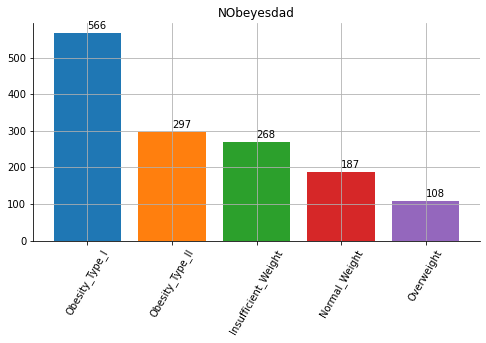

In [26]:
plot_single_categorical(dt1, 'NObeyesdad') # du lieu khong can bang

In [27]:
dt1_ft = dt1.copy()

dt1_ft['Gender'] = le_arr['Gender'].fit_transform(dt1['Gender'])
dt1_ft['family_history_with_overweight'] = le_arr['family_history_with_overweight'].fit_transform(dt1['family_history_with_overweight'])
dt1_ft['FAVC'] = le_arr['FAVC'].fit_transform(dt1['FAVC'])
dt1_ft['CAEC'] = le_arr['CAEC'].fit_transform(dt1['CAEC'])
dt1_ft['SMOKE'] = le_arr['SMOKE'].fit_transform(dt1['SMOKE'])
dt1_ft['SCC'] = le_arr['SCC'].fit_transform(dt1['SCC'])
dt1_ft['CALC'] = le_arr['CALC'].fit_transform(dt1['CALC'])
dt1_ft['MTRANS'] = le_arr['MTRANS'].fit_transform(dt1['MTRANS'])
dt1_ft['NObeyesdad'] = le_arr['NObeyesdad'].fit_transform(dt1['NObeyesdad'])

dt1_ft

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.000000,3.000000,2,0,2.000000,0,0.000000,1.000000,3,3,4
1,0,21.000000,1.520000,56.000000,1,0,3.000000,3.000000,2,1,3.000000,1,3.000000,0.000000,2,3,4
2,1,23.000000,1.800000,77.000000,1,0,2.000000,3.000000,2,0,2.000000,0,2.000000,1.000000,1,3,4
3,1,27.000000,1.800000,87.000000,0,0,3.000000,3.000000,2,0,2.000000,0,2.000000,0.000000,1,4,2
4,1,22.000000,1.780000,89.800000,0,0,2.000000,1.000000,2,0,2.000000,0,0.000000,0.000000,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,1,30.642430,1.653876,102.583895,1,1,2.919526,2.142328,2,0,1.175714,0,0.958555,0.636289,3,3,3
1795,1,20.068432,1.657132,105.580491,1,1,2.724121,1.437959,2,0,1.590418,0,0.029603,1.122118,3,3,3
1796,1,20.914366,1.644751,101.067988,1,1,2.801992,1.343117,2,0,1.128942,0,0.233987,0.819980,3,3,3
1797,1,25.512048,1.660761,104.321463,1,1,2.748971,1.213431,2,0,1.448875,0,0.128548,1.239038,3,3,3


In [28]:
dt1_ft_X = dt1_ft.drop(['NObeyesdad'], axis=1)
dt1_ft_y = dt1_ft['NObeyesdad']
dt1_ft_X_train, dt1_ft_X_test, dt1_ft_y_train, dt1_ft_y_test = train_test_split(dt1_ft_X, dt1_ft_y, test_size=TEST_SIZE)

In [29]:
dt1_ft_dt = predict_decision_tree(dt1_ft_X_train, dt1_ft_X_test, dt1_ft_y_train, dt1_ft_y_test)
print_dict(dt1_ft_dt)

confusion_matrix:
[[ 50   3   0   0   0]
 [  1  40   0   0   0]
 [  0   0 100   3   1]
 [  0   0   0  63   0]
 [  0   2   4   0  19]]

classification_report:
0:
{'precision': 0.9803921568627451, 'recall': 0.9433962264150944, 'f1-score': 0.9615384615384616, 'support': 53}
1:
{'precision': 0.8888888888888888, 'recall': 0.975609756097561, 'f1-score': 0.9302325581395349, 'support': 41}
2:
{'precision': 0.9615384615384616, 'recall': 0.9615384615384616, 'f1-score': 0.9615384615384616, 'support': 104}
3:
{'precision': 0.9545454545454546, 'recall': 1.0, 'f1-score': 0.9767441860465117, 'support': 63}
4:
{'precision': 0.95, 'recall': 0.76, 'f1-score': 0.8444444444444444, 'support': 25}
accuracy:
0.951048951048951
macro avg:
{'precision': 0.9470729923671101, 'recall': 0.9281088888102234, 'f1-score': 0.9348996223414827, 'support': 286}
weighted avg:
{'precision': 0.9520685048759915, 'recall': 0.951048951048951, 'f1-score': 0.950164574046506, 'support': 286}


In [30]:
dt1_ft_rf = predict_random_forest(dt1_ft_X_train, dt1_ft_X_test, dt1_ft_y_train, dt1_ft_y_test)
print_dict(dt1_ft_rf)

confusion_matrix:
[[ 48   5   0   0   0]
 [  0  34   5   0   2]
 [  0   0 103   0   1]
 [  0   0   0  63   0]
 [  0   6  12   0   7]]

classification_report:
0:
{'precision': 1.0, 'recall': 0.9056603773584906, 'f1-score': 0.9504950495049505, 'support': 53}
1:
{'precision': 0.7555555555555555, 'recall': 0.8292682926829268, 'f1-score': 0.7906976744186047, 'support': 41}
2:
{'precision': 0.8583333333333333, 'recall': 0.9903846153846154, 'f1-score': 0.9196428571428571, 'support': 104}
3:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 63}
4:
{'precision': 0.7, 'recall': 0.28, 'f1-score': 0.4, 'support': 25}
accuracy:
0.8916083916083916
macro avg:
{'precision': 0.8627777777777779, 'recall': 0.8010626570852066, 'f1-score': 0.8121671162132825, 'support': 286}
weighted avg:
{'precision': 0.8872183372183372, 'recall': 0.8916083916083916, 'f1-score': 0.879152795167071, 'support': 286}


In [31]:
dt1_ft_pb = predict_boosting(dt1_ft_X_train, dt1_ft_X_test, dt1_ft_y_train, dt1_ft_y_test)
print_dict(dt1_ft_pb)

confusion_matrix:
[[ 52   1   0   0   0]
 [  1  39   0   0   1]
 [  0   0 104   0   0]
 [  0   0   0  63   0]
 [  0   5  10   0  10]]

classification_report:
0:
{'precision': 0.9811320754716981, 'recall': 0.9811320754716981, 'f1-score': 0.9811320754716981, 'support': 53}
1:
{'precision': 0.8666666666666667, 'recall': 0.9512195121951219, 'f1-score': 0.9069767441860465, 'support': 41}
2:
{'precision': 0.9122807017543859, 'recall': 1.0, 'f1-score': 0.9541284403669724, 'support': 104}
3:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 63}
4:
{'precision': 0.9090909090909091, 'recall': 0.4, 'f1-score': 0.5555555555555556, 'support': 25}
accuracy:
0.9370629370629371
macro avg:
{'precision': 0.9338340705967318, 'recall': 0.866470317533364, 'f1-score': 0.8795585631160545, 'support': 286}
weighted avg:
{'precision': 0.9375447518988189, 'recall': 0.9370629370629371, 'f1-score': 0.9276373888065802, 'support': 286}


### Cân bằng dữ liệu sử dụng SMOTE

In [32]:
oversample = SMOTE()
# oversample = SMOTE(k_neighbors=1)
dt1_ft_X, dt1_ft_y = oversample.fit_resample(dt1_ft_X, dt1_ft_y)

In [33]:
print(Counter(dt1_y))
print(Counter(dt1_ft_y))

Counter({'Obesity_Type_I': 566, 'Obesity_Type_II': 297, 'Insufficient_Weight': 268, 'Normal_Weight': 187, 'Overweight': 108})
Counter({4: 566, 2: 566, 1: 566, 0: 566, 3: 566})


In [34]:
dt1_new = pd.DataFrame(dt1_ft_X)
dt1_new['NObeyesdad'] = dt1_ft_y
# dt1_new

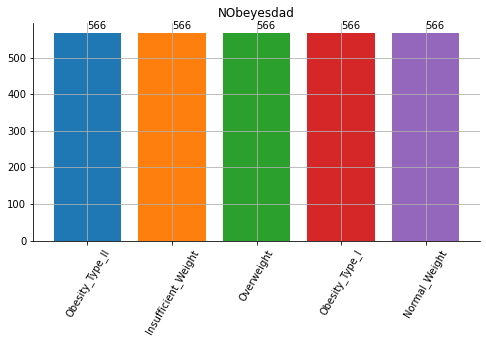

In [35]:
dt1_new['NObeyesdad'] = le_arr['NObeyesdad'].inverse_transform(dt1_new['NObeyesdad'])
plot_single_categorical(dt1_new, 'NObeyesdad') # du lieu can bang
dt1_new['NObeyesdad'] = le_arr['NObeyesdad'].transform(dt1_new['NObeyesdad'])

In [36]:
dt1_new_X = dt1_new.drop(['NObeyesdad'], axis=1)
dt1_new_y = dt1_new['NObeyesdad']
dt1_new_X_train, dt1_new_X_test, dt1_new_y_train, dt1_new_y_test = train_test_split(dt1_new_X, dt1_new_y, test_size=TEST_SIZE)

In [37]:
dt1_new_dt = predict_decision_tree(dt1_new_X_train, dt1_new_X_test, dt1_new_y_train, dt1_new_y_test)
print_dict(dt1_new_dt)

confusion_matrix:
[[115   1   0   0   0]
 [  2 100   0   0   2]
 [  0   2 109   0   5]
 [  0   0   1  99   0]
 [  0   3   4   0 123]]

classification_report:
0:
{'precision': 0.9829059829059829, 'recall': 0.9913793103448276, 'f1-score': 0.9871244635193134, 'support': 116}
1:
{'precision': 0.9433962264150944, 'recall': 0.9615384615384616, 'f1-score': 0.9523809523809524, 'support': 104}
2:
{'precision': 0.956140350877193, 'recall': 0.9396551724137931, 'f1-score': 0.9478260869565217, 'support': 116}
3:
{'precision': 1.0, 'recall': 0.99, 'f1-score': 0.9949748743718593, 'support': 100}
4:
{'precision': 0.9461538461538461, 'recall': 0.9461538461538461, 'f1-score': 0.9461538461538461, 'support': 130}
accuracy:
0.9646643109540636
macro avg:
{'precision': 0.9657192812704233, 'recall': 0.9657453580901857, 'f1-score': 0.9656920446764985, 'support': 566}
weighted avg:
{'precision': 0.964739544639608, 'recall': 0.9646643109540636, 'f1-score': 0.9646631984805687, 'support': 566}


In [38]:
dt1_new_rf = predict_random_forest(dt1_new_X_train, dt1_new_X_test, dt1_new_y_train, dt1_new_y_test)
print_dict(dt1_new_rf)

confusion_matrix:
[[116   0   0   0   0]
 [  0 102   0   0   2]
 [  0   0 107   0   9]
 [  0   0   0 100   0]
 [  0   1   4   0 125]]

classification_report:
0:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 116}
1:
{'precision': 0.9902912621359223, 'recall': 0.9807692307692307, 'f1-score': 0.9855072463768114, 'support': 104}
2:
{'precision': 0.963963963963964, 'recall': 0.9224137931034483, 'f1-score': 0.9427312775330396, 'support': 116}
3:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 100}
4:
{'precision': 0.9191176470588235, 'recall': 0.9615384615384616, 'f1-score': 0.9398496240601504, 'support': 130}
accuracy:
0.9717314487632509
macro avg:
{'precision': 0.9746745746317419, 'recall': 0.9729442970822282, 'f1-score': 0.9736176295940002, 'support': 566}
weighted avg:
{'precision': 0.9722533660770367, 'recall': 0.9717314487632509, 'f1-score': 0.9717845105032518, 'support': 566}


In [39]:
dt1_new_pb = predict_boosting(dt1_new_X_train, dt1_new_X_test, dt1_new_y_train, dt1_new_y_test)
print_dict(dt1_new_pb)

confusion_matrix:
[[116   0   0   0   0]
 [  3  99   0   0   2]
 [  0   0 112   0   4]
 [  0   0   1  99   0]
 [  0   1   7   0 122]]

classification_report:
0:
{'precision': 0.9747899159663865, 'recall': 1.0, 'f1-score': 0.9872340425531915, 'support': 116}
1:
{'precision': 0.99, 'recall': 0.9519230769230769, 'f1-score': 0.9705882352941176, 'support': 104}
2:
{'precision': 0.9333333333333333, 'recall': 0.9655172413793104, 'f1-score': 0.9491525423728815, 'support': 116}
3:
{'precision': 1.0, 'recall': 0.99, 'f1-score': 0.9949748743718593, 'support': 100}
4:
{'precision': 0.953125, 'recall': 0.9384615384615385, 'f1-score': 0.9457364341085271, 'support': 130}
accuracy:
0.9681978798586572
macro avg:
{'precision': 0.9702496498599439, 'recall': 0.9691803713527852, 'f1-score': 0.9695372257401154, 'support': 566}
weighted avg:
{'precision': 0.9685663373123101, 'recall': 0.9681978798586572, 'f1-score': 0.9682071452178571, 'support': 566}


# =====================================

In [40]:
dt2 = dt_ft.copy()

# dt2['BMI'] = dt2['Weight']/(dt2['Height']*dt2['Height'])
# del dt2['Weight']
# del dt2['Height']
# del dt2['Age']

# # BMI
# dt2.loc[dt2['BMI'] < 18.5, ['BMI']] = 0
# dt2.loc[(dt2['BMI'] >= 18.5) & (dt2['BMI'] < 30), ['BMI']] = 1
# dt2.loc[(dt2['BMI'] >= 23) & (dt2['BMI'] < 25), ['BMI']] = 2
# dt2.loc[(dt2['BMI'] >= 25) & (dt2['BMI'] < 30), ['BMI']] = 3
# dt2.loc[dt2['BMI'] >= 30, ['BMI']] = 4


# an rau
dt2.loc[dt2['FCVC'] < 1, ['FCVC']] = 0
dt2.loc[(dt2['FCVC'] >= 1) & (dt2['FCVC'] < 2) , ['FCVC']] = int(1)
dt2.loc[dt2['FCVC'] >= 2, ['FCVC']] = 2

# bua an chinh
dt2.loc[(dt2['NCP'] >= 1) & (dt2['NCP'] < 2), ['NCP']] = 0
dt2.loc[(dt2['NCP'] >= 2) & (dt2['NCP'] < 3), ['NCP']] = 1
dt2.loc[dt2['NCP'] >= 3, ['NCP']] = 2

# uong nuoc
dt2.loc[dt2['CH2O'] < 1, ['CH2O']] = 0
dt2.loc[(dt2['CH2O'] >= 1) & (dt2['CH2O'] < 2), ['CH2O']] = 1
dt2.loc[dt2['CH2O'] >= 2, ['CH2O']] = 2

# tap the duc
dt2.loc[dt2['FAF'] < 1, ['FAF']] = 0
dt2.loc[(dt2['FAF'] >= 1) & (dt2['FAF'] < 2), ['FAF']] = 1
dt2.loc[(dt2['FAF'] >= 2) & (dt2['FAF'] < 4), ['FAF']] = 2
dt2.loc[dt2['FAF'] >= 4, ['FAF']] = 3

# su dung thiet bi cong nghe
dt2.loc[(dt2['TUE'] >= 0) & (dt2['TUE'] < 2), ['TUE']] = 0
dt2.loc[(dt2['TUE'] >= 2) & (dt2['TUE'] < 4), ['TUE']] = 1
dt2.loc[(dt2['TUE'] >= 4), ['TUE']] = 2

dt2 = dt2.astype({
    'FCVC': 'int32',
    'NCP': 'int32',
    'CH2O': 'int32',
    'FAF': 'int32',
    'TUE': 'int32'
})

dt2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2,2,2,0,2,0,0,0,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,2,2,2,1,2,1,2,0,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2,2,2,0,2,0,2,0,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,2,2,2,0,2,0,2,0,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2,0,2,0,2,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,2,2,2,0,1,0,1,0,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,2,2,2,0,2,0,1,0,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,2,2,2,0,2,0,1,0,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,2,2,2,0,2,0,1,0,2,3,4


In [41]:
dt2_X = dt2.drop(['NObeyesdad'], axis=1)
dt2_y = dt2['NObeyesdad']
dt2_X_train, dt2_X_test, dt2_y_train, dt2_y_test = train_test_split(dt2_X, dt2_y, test_size=TEST_SIZE)

In [42]:
dt2_dt = predict_decision_tree(dt2_X_train, dt2_X_test, dt2_y_train, dt2_y_test)
print_dict(dt2_dt)

confusion_matrix:
[[55  2  0  0  0  0  0]
 [ 1 54  0  0  0  2  0]
 [ 0  0 70  0  1  0  0]
 [ 0  0  3 54  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  0  0  0  0 62  1]
 [ 0  0  4  0  0  3 42]]

classification_report:
0:
{'precision': 0.9821428571428571, 'recall': 0.9649122807017544, 'f1-score': 0.9734513274336283, 'support': 57}
1:
{'precision': 0.9642857142857143, 'recall': 0.9473684210526315, 'f1-score': 0.9557522123893805, 'support': 57}
2:
{'precision': 0.9090909090909091, 'recall': 0.9859154929577465, 'f1-score': 0.9459459459459459, 'support': 71}
3:
{'precision': 1.0, 'recall': 0.9473684210526315, 'f1-score': 0.972972972972973, 'support': 57}
4:
{'precision': 0.9857142857142858, 'recall': 1.0, 'f1-score': 0.9928057553956835, 'support': 69}
5:
{'precision': 0.9253731343283582, 'recall': 0.9841269841269841, 'f1-score': 0.9538461538461538, 'support': 63}
6:
{'precision': 0.9767441860465116, 'recall': 0.8571428571428571, 'f1-score': 0.9130434782608695, 'support': 49}
accuracy:
0.9598108747

In [43]:
dt2_rf = predict_random_forest(dt2_X_train, dt2_X_test, dt2_y_train, dt2_y_test)
print_dict(dt2_rf)

confusion_matrix:
[[56  1  0  0  0  0  0]
 [ 1 49  0  0  0  7  0]
 [ 0  0 66  0  0  1  4]
 [ 0  0  1 56  0  0  0]
 [ 0  0  0  0 69  0  0]
 [ 0  1  0  0  0 61  1]
 [ 0  1  0  0  0  1 47]]

classification_report:
0:
{'precision': 0.9824561403508771, 'recall': 0.9824561403508771, 'f1-score': 0.9824561403508771, 'support': 57}
1:
{'precision': 0.9423076923076923, 'recall': 0.8596491228070176, 'f1-score': 0.8990825688073394, 'support': 57}
2:
{'precision': 0.9850746268656716, 'recall': 0.9295774647887324, 'f1-score': 0.9565217391304348, 'support': 71}
3:
{'precision': 1.0, 'recall': 0.9824561403508771, 'f1-score': 0.9911504424778761, 'support': 57}
4:
{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 69}
5:
{'precision': 0.8714285714285714, 'recall': 0.9682539682539683, 'f1-score': 0.9172932330827068, 'support': 63}
6:
{'precision': 0.9038461538461539, 'recall': 0.9591836734693877, 'f1-score': 0.9306930693069307, 'support': 49}
accuracy:
0.9550827423167849
macro avg:
{'precision

In [44]:
# import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph

In [45]:
# from sklearn.tree import plot_tree
# plot_tree(clf,
#                feature_names = column_names, 
#                class_names=class_names.astype('str'),
#                filled = True)